In [3]:
from core.DataLoader import *
from core.models.MLP import * 
from core.models.GAM import *
from core.models.SVM import *
# from core.models.EBM import *

from core.models.RandomForest import *
from core.Visualizer import *
from core.models.Classifier import *
import sklearn
# import shap
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier

In [6]:
weighted_clf_model_list ={
    "MLP": MLPClassifier,
    "DT": m_DecisionTreeClassifier,
    "RF": m_RandomForestClassifier,
    "LR": m_LogisticRegression,
    "SVM": SVMClassifier
}
# weighted_clf_model_name_list = ['MLP', 'RF(5)', 'RF(10)', 'RF(U)', 'DT(5)', 'DT(10)', 'DT(U)', 'LR']
weighted_clf_model_name_list = ['DT(5)']

# if 'MLP' not in weighted_clf_model_name_list[0]:
#     explainer = shap.TreeExplainer
# else:
#     explainer = shap.DeepExplainer
    

In [16]:
# feature_scores = {
    
# }

overall_imp = []

m_models = {
    'postgres': [],
    'mssql': []
}

# for f in features:
#     feature_scores[f] = 0

for engine in ['postgres', 'mssql']:
    
    
    dl = DataLoader(engine)
    one_file_dss, one_file_names = dl.get_one_file_ds(return_type='ds and names', datasets=['ssb', 'tpch', 'imdb'])


    all_features = dl.base_features
    classification_target = dl.classification_target

    features = all_features
    print("Using features: ", features)
    
    feature_imp = np.zeros(len(features))
    
    
#     present_idxs = [i for i in range(len(one_file_dss))]
    present_idxs = [0, 1, 2, 3, 4, 5, 8 ,12, 21, 22, 23, 24]
#     present_idxs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11 ,12, 13, 21, 22, 23, 24]

#     if engine == 'postgres':
#         present_idxs = [0, 1, 2, 3, 4, 5, 8 ,12, 22]
#     elif engine == 'mssql':
#         present_idxs = [0, 1, 2, 3, 4,5, 8 ,12, 21, 22]
        
    

    for i in present_idxs:
    #     i = 0
        # ds = one_file_dss[i][one_file_dss[i]['predicate_op_num_on_non_indexed_attr'] == 0]

        ds = one_file_dss[i]
        ds_name = one_file_names[i]


        if one_file_dss[i].shape[0] <= 0:
            continue

        # =========================
        X = ds[features]
        y = ds['optimal_decision']
        X_costs = ds[dl.regression_targets]

        from sklearn.model_selection import train_test_split
        from sklearn import preprocessing

        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=1)
        X_train_costs, _, _, _, = train_test_split(X_costs, y, train_size=0.8, random_state=1)
        X_train, X_test, y_train, y_test = \
            X_train.to_numpy(),X_test.to_numpy(), y_train.to_numpy(), y_test.to_numpy()

        X_train_weights = calculate_importance_from_costs(X_train_costs.to_numpy())

        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)

        # scaler = preprocessing.StandardScaler().fit(X_test)
        X_test = scaler.transform(X_test)

        X_train_weights = preprocessing.MinMaxScaler().fit_transform(X_train_weights.reshape(-1,1)).flatten()
        # =========================        
        
        clf = DecisionTreeClassifier(max_depth=None)
        
        seq_feat_sel = SequentialFeatureSelector(clf, n_features_to_select=2, direction='backward')
        seq_feat_sel.fit(X_train, y_train)
#         print(seq_feat_sel.get_support())
        feature_imp += seq_feat_sel.get_support()
    print("Feature importance: ", feature_imp)
    

Using features:  ['left_cardinality', 'base_cardinality', 'sel_of_pred_on_indexed_attr', 'sel_of_pred_on_non_indexed_attr', 'sel_of_join_pred', 'left_ordered', 'base_ordered', 'left_indexed', 'base_indexed', 'result_size', 'predicate_op_num_on_indexed_attr', 'predicate_op_num_on_non_indexed_attr']
Feature importance:  [12.  0. 12.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[Warning]: file ../../sample_results/tpch/nation/mssql_region_nation_optimal.csv does not exist. Passed.
[Warning]: file ../../sample_results/tpch/lineitem/mssql_orders_lineitem_optimal.csv does not exist. Passed.
Using features:  ['left_cardinality', 'base_cardinality', 'sel_of_pred_on_indexed_attr', 'sel_of_pred_on_non_indexed_attr', 'sel_of_join_pred', 'left_ordered', 'base_ordered', 'left_indexed', 'base_indexed', 'result_size', 'predicate_op_num_on_indexed_attr', 'predicate_op_num_on_non_indexed_attr']


/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in 

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:668: UserWarning: The least populated class in 

Feature importance:  [3. 0. 3. 5. 8. 1. 0. 0. 0. 4. 0. 0.]


In [15]:
overall_imp

[array([4.30692621e-01, 0.00000000e+00, 2.74272301e-01, 4.36330660e-03,
        8.52116265e-02, 3.90880898e-02, 7.80791785e-02, 7.47413460e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.29994632e-02, 4.84251619e-04, 6.78154187e-05]),
 array([2.10748081e-01, 0.00000000e+00, 8.01241506e-02, 6.35465253e-02,
        5.10665185e-01, 4.90557368e-02, 8.79378721e-03, 1.92352030e-03,
        3.10606989e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.37675837e-02, 2.40486276e-04, 7.42454577e-05])]

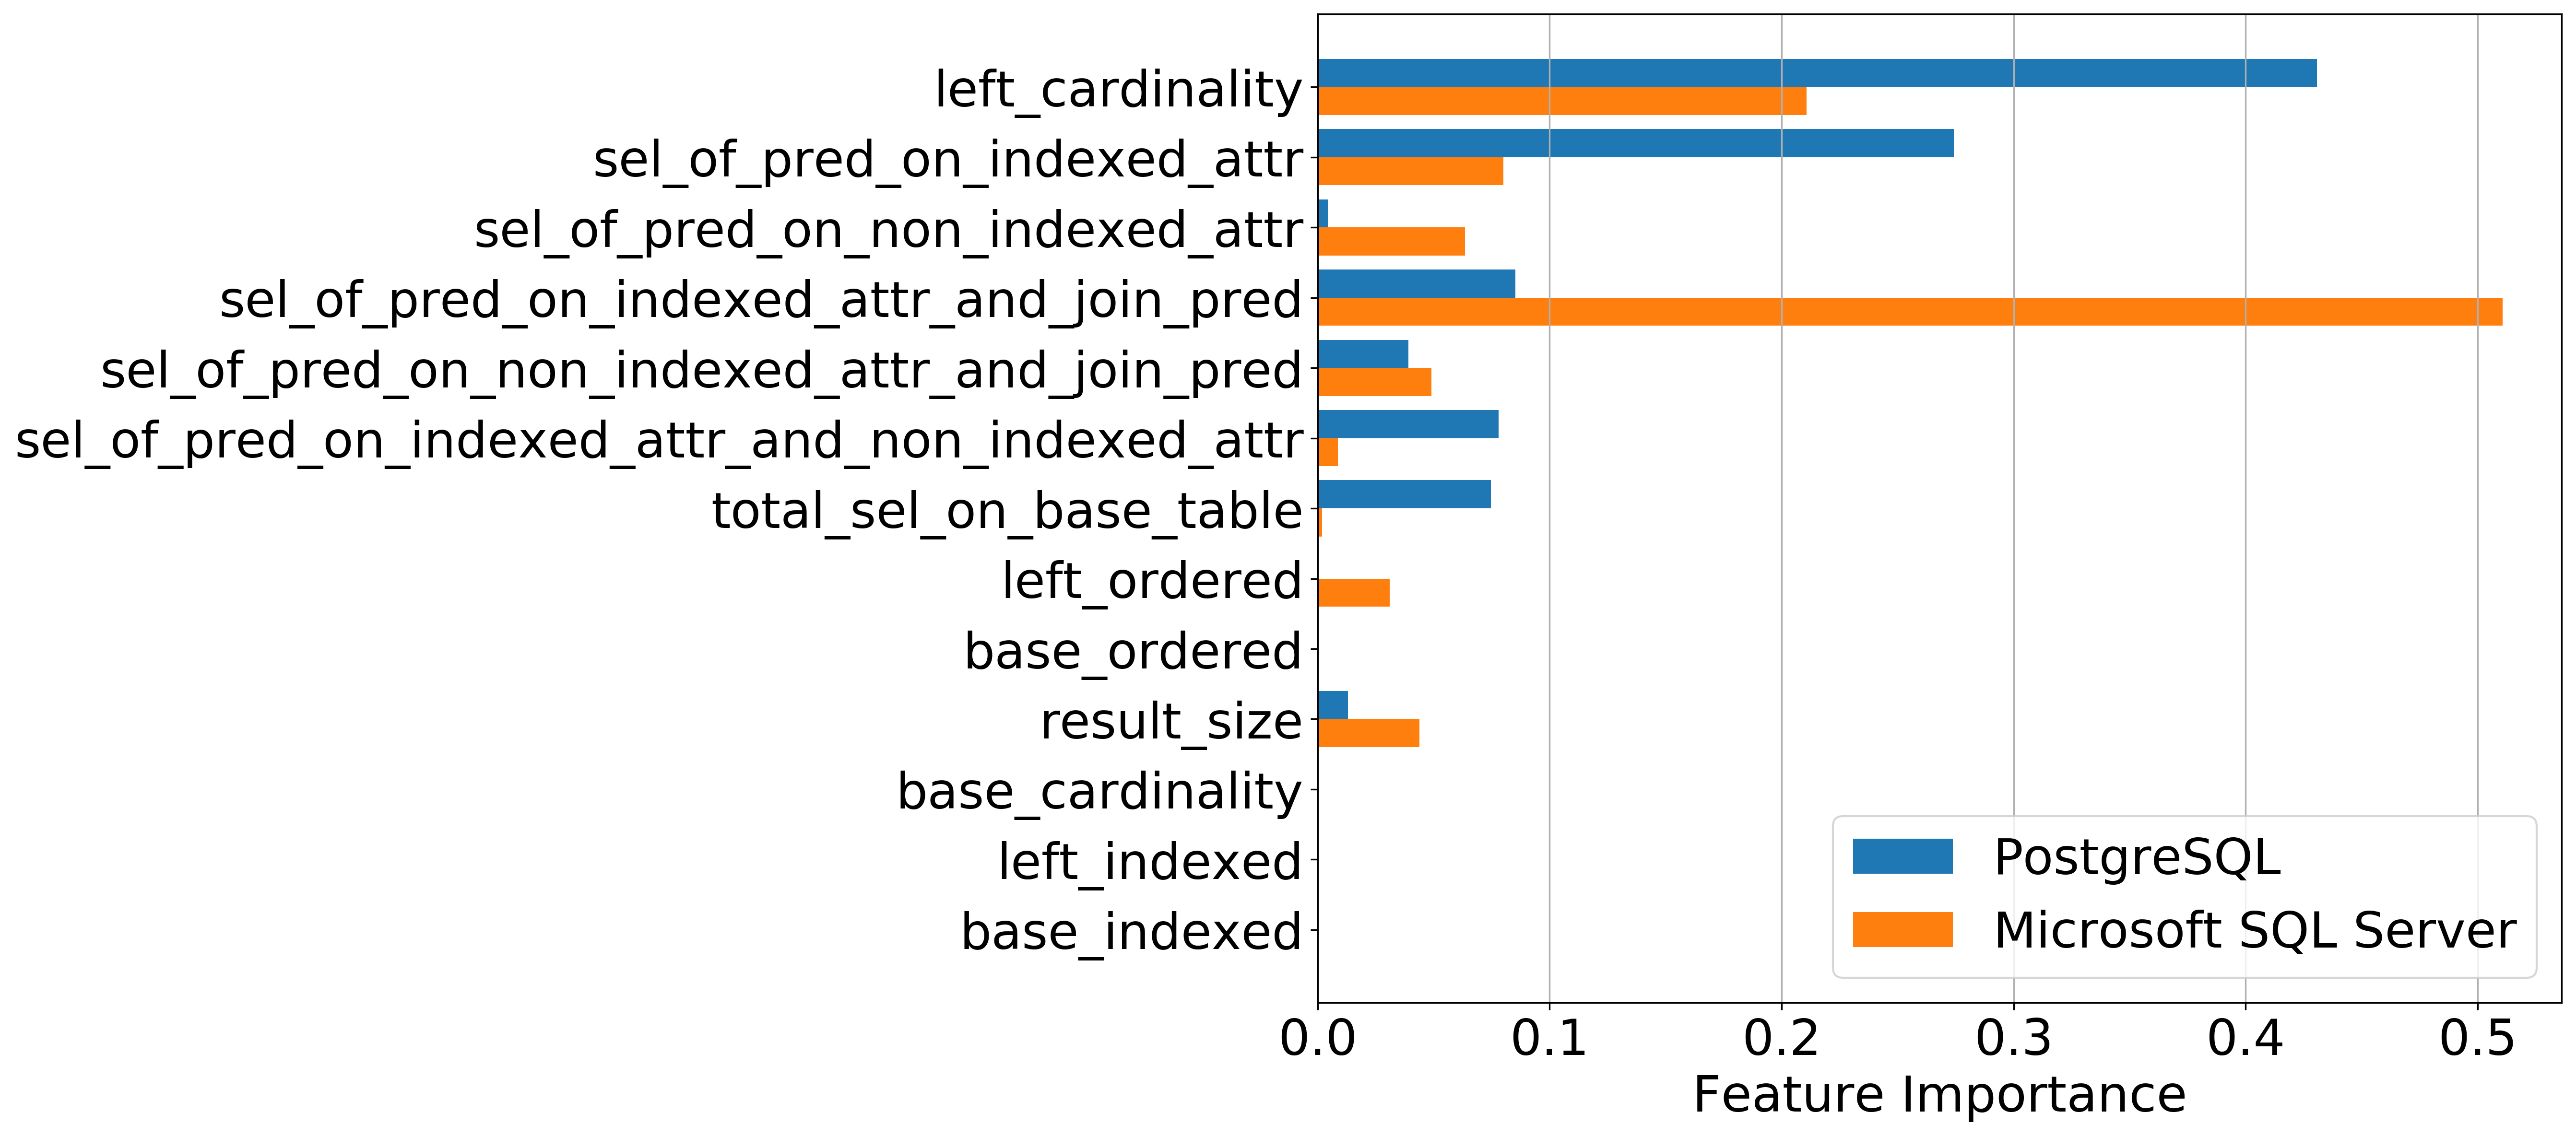

In [16]:
postgre_imp = overall_imp[0]
mssql_imp = overall_imp[1]
# shap_values = shap_values / len(present_idxs)
# importances = np.array([feature_scores[f] for f in features])

# ===========================================
# indices = np.argsort(importances)
# ===========================================
barWidth = 0.4
indices = [11, 10, 1, 12,  9, 8, 7, 6, 5, 4, 3, 2, 0]

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

plt.figure(figsize=(18, 8), dpi=300)

# plt.title('Feature Importances')
r1 = [i - 0.5 * barWidth for i in range(13)]
r2 = [x + barWidth for x in r1]

plt.barh(r2, postgre_imp[indices], height=barWidth, color='tab:blue', align='center',  label='PostgreSQL')
plt.barh(r1 , mssql_imp[indices], height=barWidth , color='tab:orange', align='center', label='Microsoft SQL Server')



plt.yticks(range(len(indices)), [dl.all_features[i] for i in indices])
plt.xlabel('Feature Importance', fontsize=25)

axes = plt.gca()
axes.tick_params(axis='x', which='major', labelsize=25)
axes.tick_params(axis='y', which='major', labelsize=25)

plt.legend(loc='lower right', prop={'size': 25})

plt.grid(axis='x')
plt.tight_layout()
plt.savefig(f'./figures/exp2-dt-feat-imp-both.pdf')
plt.show()

# feature maps:

In [ ]:
for feat, feat_idx in zip(dl.all_features, dl.all_feature_idx):
    print(f"{feat_idx} == {feat}")

In [7]:
one_file_names

['ssb part/mssql_lineorder_part_optimal.csv',
 'ssb customer/mssql_lineorder_customer_optimal.csv',
 'ssb ddate/mssql_lineorder_ddate_optimal.csv',
 'ssb supplier/mssql_lineorder_supplier_optimal.csv',
 'tpch customer/mssql_orders_customer_optimal.csv',
 'tpch orders/mssql_customer_orders_optimal.csv',
 'tpch orders/mssql_lineitem_orders_optimal.csv',
 'tpch part/mssql_lineitem_part_optimal.csv',
 'tpch part/mssql_partsupp_part_optimal.csv',
 'tpch partsupp/mssql_lineitem_partsupp_optimal.csv',
 'tpch partsupp/mssql_part_partsupp_optimal.csv',
 'tpch partsupp/mssql_supplier_partsupp_optimal.csv',
 'tpch supplier/mssql_lineitem_supplier_optimal.csv',
 'tpch supplier/mssql_partsupp_supplier_optimal.csv',
 'tpch nation/mssql_region_nation_optimal.csv',
 'tpch lineitem/mssql_orders_lineitem_optimal.csv',
 'imdb cast_info/mssql_title_cast_info_optimal.csv',
 'imdb movie_companies/mssql_title_movie_companies_optimal.csv',
 'imdb movie_info/mssql_title_movie_info_optimal.csv',
 'imdb movie_in